In [ ]:
from google.colab import drive
import os
import cv2
import numpy as np
from skimage.color import rgb2lab
from skimage.feature import hog
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score

# Mount Google Drive
drive.mount('/content/drive')

# Paths to train and test folders
train_folder = '/content/drive/My Drive/HWData/train'
test_folder = '/content/drive/My Drive/HWData/test'

def load_images_from_folder(folder):
    images = []
    labels = []
    class_names = sorted(os.listdir(folder))
    for label, class_name in enumerate(class_names):
        class_folder = os.path.join(folder, class_name)
        for filename in os.listdir(class_folder):
            img_path = os.path.join(class_folder, filename)
            img = cv2.imread(img_path)
            if img is not None:
                images.append(img)
                labels.append(label)
    return images, labels, class_names

train_images, train_labels, class_names = load_images_from_folder(train_folder)
test_images, test_labels, _ = load_images_from_folder(test_folder)

print(f"Loaded {len(train_images)} training images and {len(test_images)} test images.")

def extract_hog_features(images):
    hog_features = []
    for img in images:
        img_resized = cv2.resize(img, (224, 224))
        img_lab = rgb2lab(img_resized)
        hog_feature = hog(img_lab, pixels_per_cell=(16, 16), cells_per_block=(2, 2), multichannel=True)
        hog_features.append(hog_feature)
    return np.array(hog_features)

train_features = extract_hog_features(train_images)
test_features = extract_hog_features(test_images)

print(f"Extracted HOG features for {train_features.shape[0]} training images and {test_features.shape[0]} test images.")

# Train SVM
svm_classifier = SVC(kernel='linear', decision_function_shape='ovr')
svm_classifier.fit(train_features, train_labels)

# Predict on test data
test_predictions = svm_classifier.predict(test_features)

# Evaluate the model
conf_matrix = confusion_matrix(test_labels, test_predictions)
accuracy = accuracy_score(test_labels, test_predictions)

print("Confusion Matrix:\n", conf_matrix)
print("Accuracy:", accuracy)


Mounted at /content/drive
Loaded 291 training images and 127 test images.


<ipython-input-1-39d4668e5472>:41: FutureWarning: `multichannel` is a deprecated argument name for `hog`. It will be removed in version 1.0. Please use `channel_axis` instead.
  hog_feature = hog(img_lab, pixels_per_cell=(16, 16), cells_per_block=(2, 2), multichannel=True)


Extracted HOG features for 291 training images and 127 test images.
Confusion Matrix:
 [[42  0  0  0  0  0  0  1  0  0  3  0  0  0  0]
 [ 1  3  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 13  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 3  0  0  0  0  0  0  0  0  0  1  0  0  0  0]
 [ 4  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 2  0  0  0  0  1  0  0  0  0  1  0  0  0  0]
 [ 3  0  0  0  0  0  0  1  0  0  0  0  0  0  0]
 [ 4  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 2  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 5  0  0  0  0  0  0  0  0  6  0  0  0  0  0]
 [ 4  0  0  0  0  0  0  0  0  0  4  0  0  0  0]
 [ 2  0  0  0  0  0  0  0  0  0  0  1  0  0  0]
 [ 4  0  0  0  0  0  0  0  0  0  0  0  4  0  0]
 [ 2  0  0  0  0  0  0  0  0  0  0  0  0  6  0]
 [ 3  0  0  0  0  0  0  0  0  0  0  0  0  0  1]]
Accuracy: 0.6377952755905512


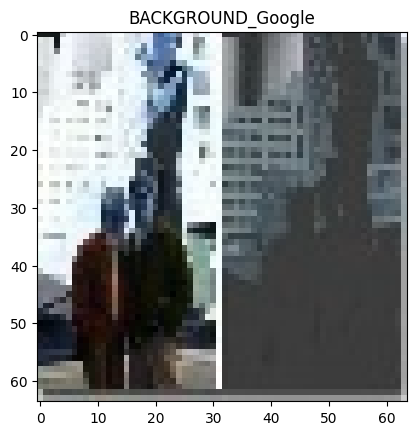

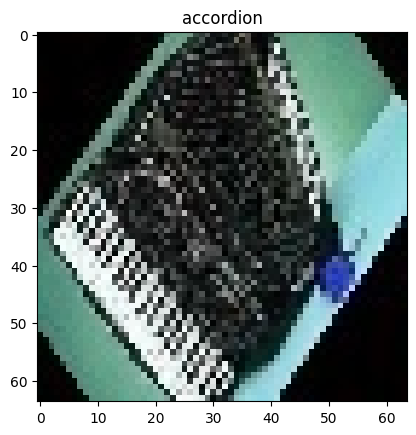

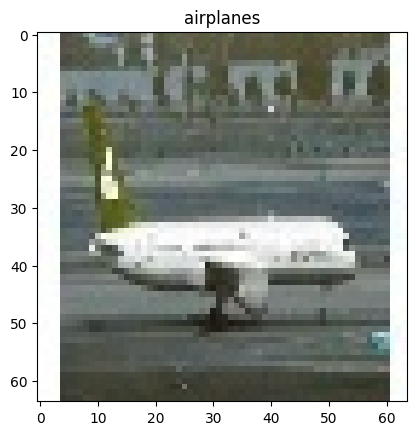

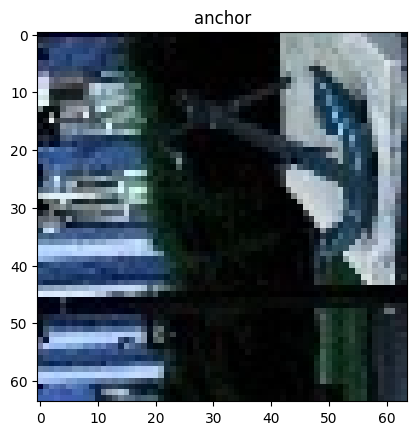

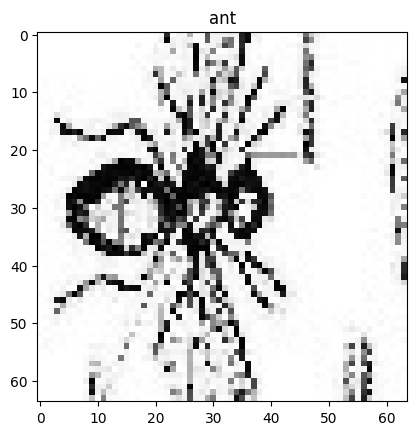

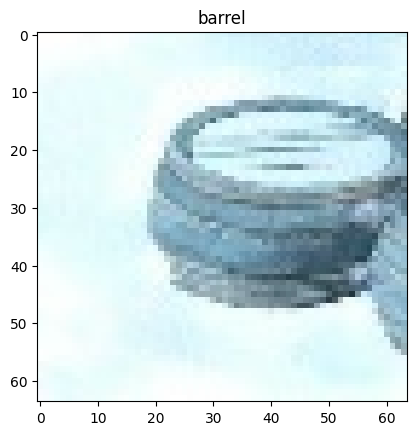

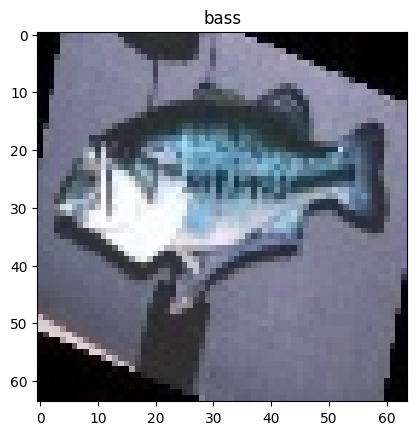

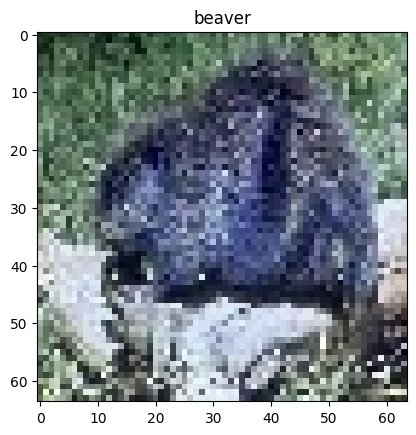

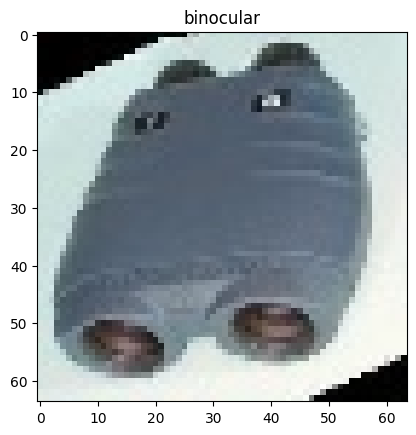

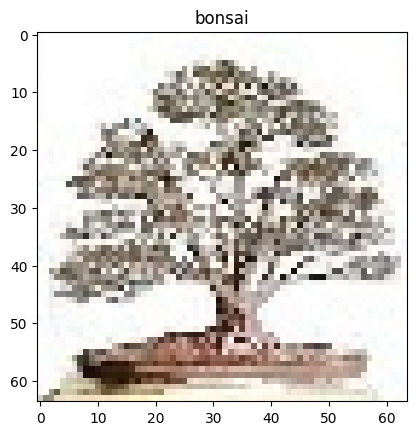

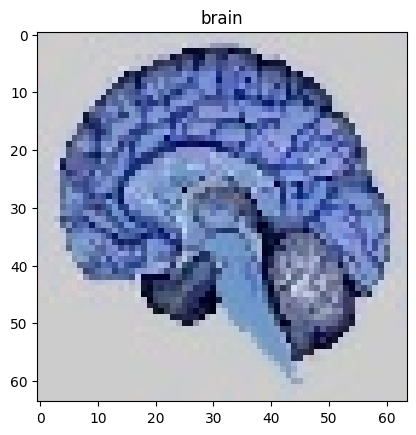

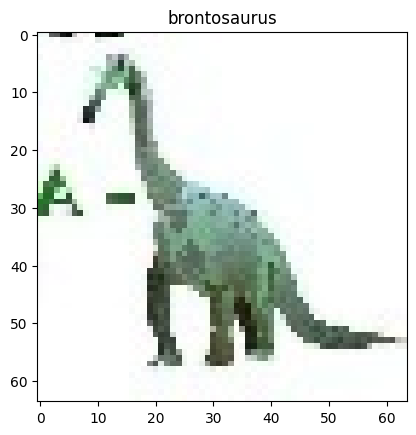

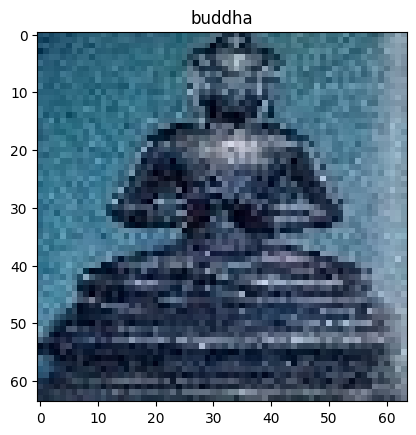

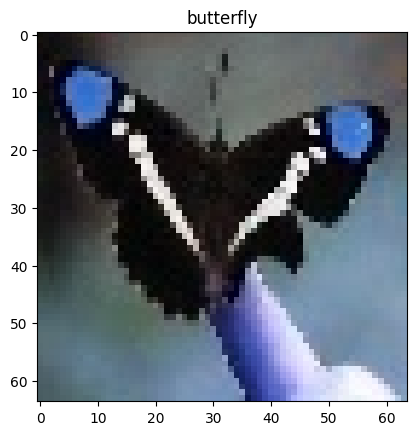

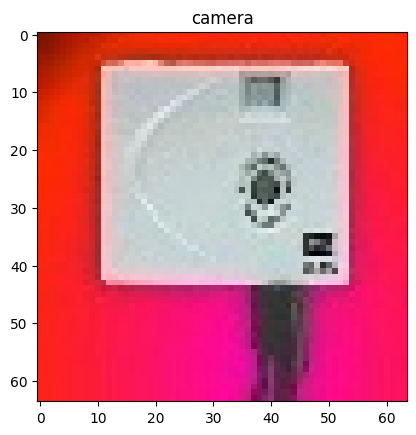

In [ ]:
#rgb olarak okunmuş her sınıftan bir resim

import matplotlib.pyplot as plt

for class_name in class_names:
    class_folder = os.path.join(train_folder, class_name)
    for filename in os.listdir(class_folder):
        img_path = os.path.join(class_folder, filename)
        img = cv2.imread(img_path)
        plt.imshow(img)
        plt.title(class_name)
        plt.show()
        break


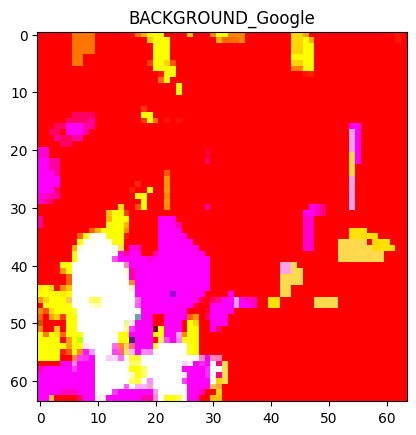

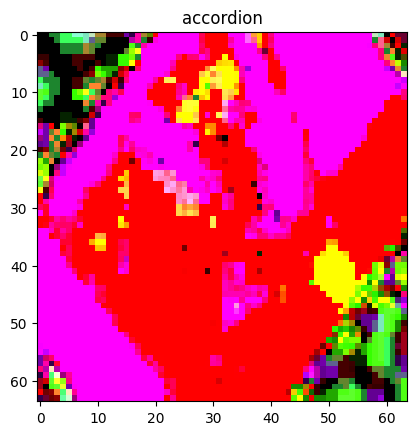

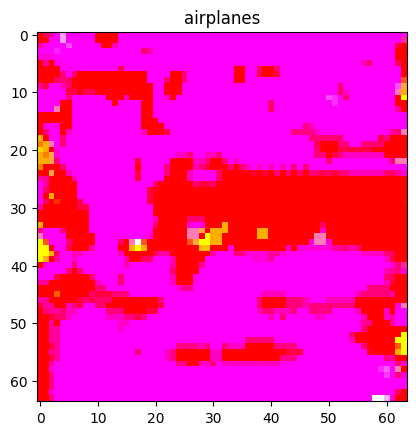

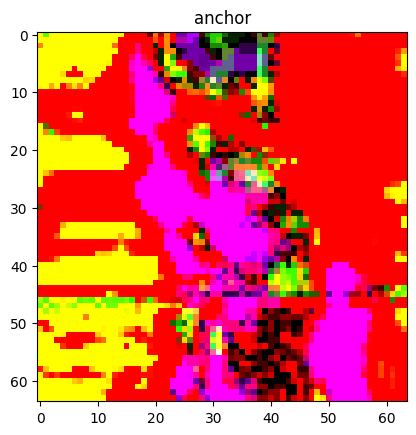

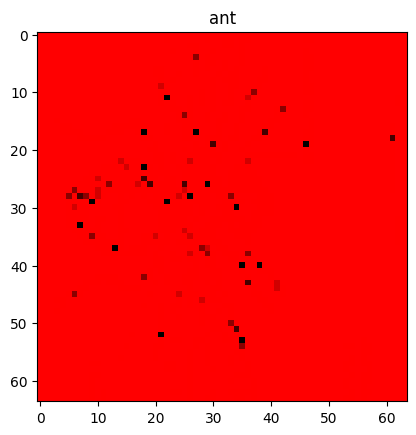

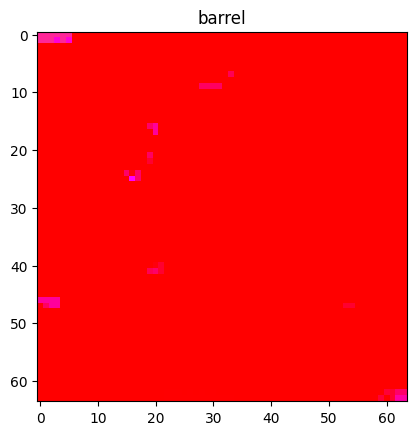

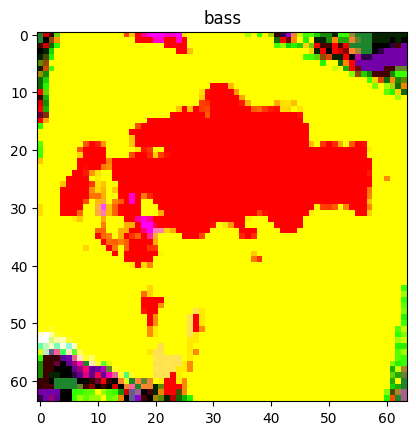

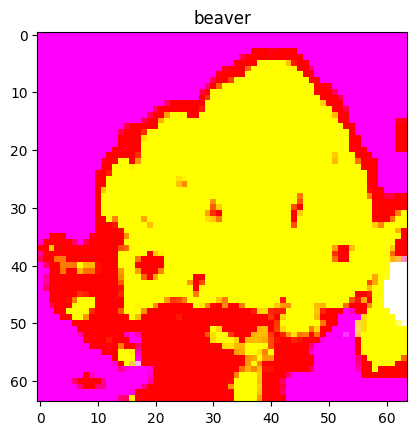

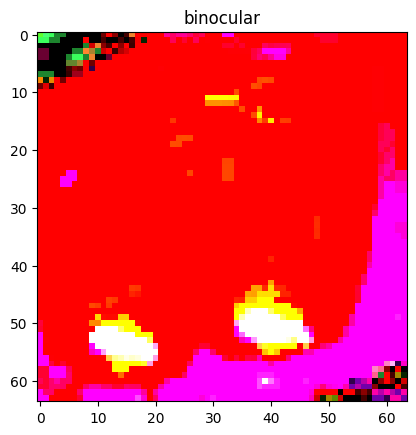

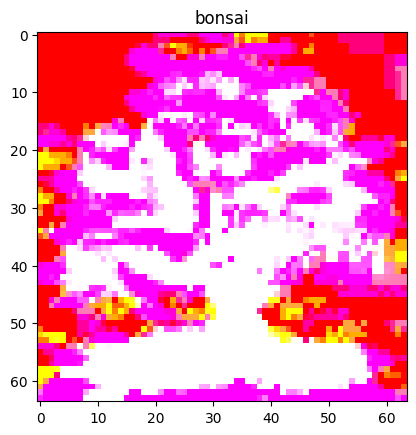

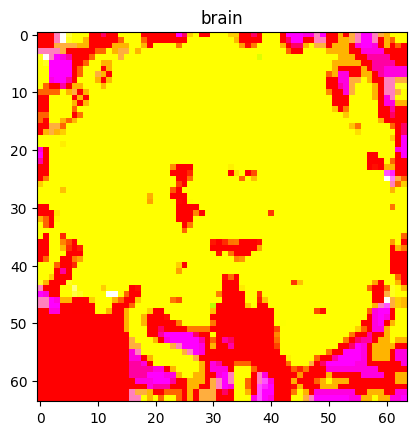

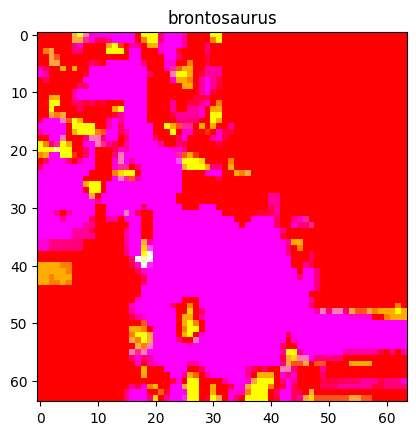

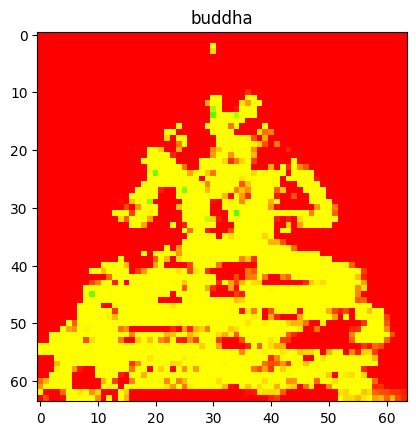

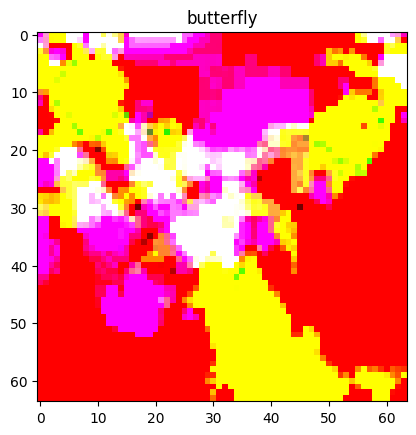

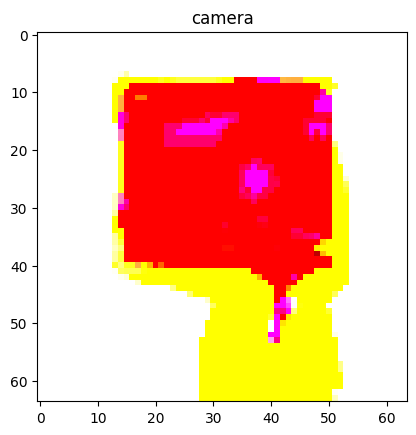

In [ ]:
# rgb to lab a dönüşmüş her sınıftan bir resim

for class_name in class_names:
    class_folder = os.path.join(train_folder, class_name)
    for filename in os.listdir(class_folder):
        img_path = os.path.join(class_folder, filename)
        img = cv2.imread(img_path)
        img_lab = rgb2lab(img)
        plt.imshow(img_lab)
        plt.title(class_name)
        plt.show()
        break
